## Linguagem Programação Estatistica

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [24]:
df = pd.read_excel(r"C:\Users\uilli\OneDrive\Área de Trabalho\Estudo\Python\Analise Estatistica Cerveja\cervejaria.xlsx")
df.head()

,visitas,excursoes,preco,ano,trimestre,data
0,86947.0,115.0,4.6,2014,1,Q1 2014
1,134868.0,135.0,5.1,2014,2,Q2 2014
2,143617.0,155.0,5.3,2014,3,Q3 2014
3,102210.0,157.0,4.6,2014,4,Q4 2014
4,93407.0,110.0,4.5,2015,1,Q1 2015


1) Faça um gráfico de dispersão das variáveis visitas e excursões, o gráfico exibe alguma relação linear? Sim ou não e porquê 


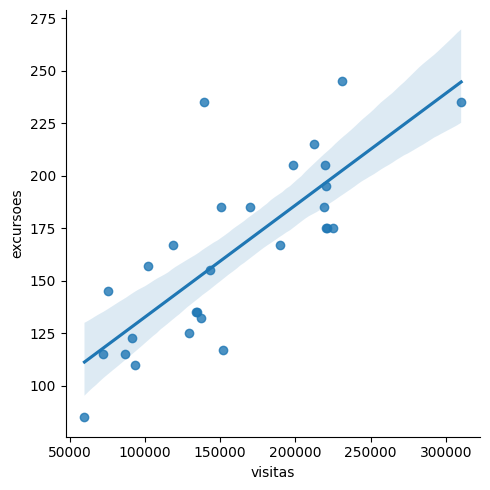

In [25]:
# modelos lineares
sns.lmplot(x = 'visitas' , y = "excursoes", data=df)

2) Faça um gráfico de dispersão das variáveis visitas e preco, o gráfico exibe alguma relação linear? Sim ou não e porquê 


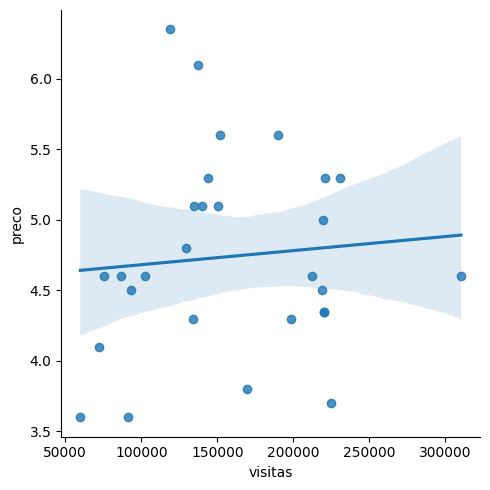

In [26]:
sns.lmplot(x = 'visitas' , y = "preco", data=df)

### Matriz de Correlação

3.1) Qual a variável que possui a maior correlação com a variável visitas?


In [27]:
df.shape

(28, 6)

In [28]:
# resultou erro porque não é possivel fazer uma correlção entre stings e float

df.corr()

ValueError: could not convert string to float: 'Q1 2014'

In [31]:
def converte_quarter_numerico(quarter_str):
    ''' Recebe um dado Sring para retonnar um inteiro '''
    quarter, year = quarter_str.split()
    quarter_num = int(quarter[1])
    year_num = int(year)
    return year_num + (quarter_num - 1) / 4

In [32]:
df['data_numerica'] =  df['data'].apply(converte_quarter_numerico)

In [33]:
print(df)

     visitas  excursoes  preco   ano  trimestre     data  data_numerica
0    86947.0      115.0   4.60  2014          1  Q1 2014        2014.00
1   134868.0      135.0   5.10  2014          2  Q2 2014        2014.25
2   143617.0      155.0   5.30  2014          3  Q3 2014        2014.50
3   102210.0      157.0   4.60  2014          4  Q4 2014        2014.75
4    93407.0      110.0   4.50  2015          1  Q1 2015        2015.00
5   151975.0      117.0   5.60  2015          2  Q2 2015        2015.25
6   137507.0      132.5   6.10  2015          3  Q3 2015        2015.50
7   118568.0      167.0   6.35  2015          4  Q4 2015        2015.75
8    59924.0       85.0   3.60  2016          1  Q1 2016        2016.00
9   224988.0      175.0   3.70  2016          2  Q2 2016        2016.25
10  169767.0      185.0   3.80  2016          3  Q3 2016        2016.50
11   91459.0      123.0   3.60  2016          4  Q4 2016        2016.75
12   72018.0      115.0   4.10  2017          1  Q1 2017        

In [39]:
print(df.columns)

Index(['visitas', 'excursoes', 'preco', 'ano', 'trimestre', 'data',
       'data_numerica'],
      dtype='object')


In [46]:
testando = df[['visitas', 'excursoes', 'preco', 'ano','trimestre']]

In [45]:
new_df = df[['visitas', 'excursoes', 'preco', 'data_numerica']]
print(new_df)

     visitas  excursoes  preco  data_numerica
0    86947.0      115.0   4.60        2014.00
1   134868.0      135.0   5.10        2014.25
2   143617.0      155.0   5.30        2014.50
3   102210.0      157.0   4.60        2014.75
4    93407.0      110.0   4.50        2015.00
5   151975.0      117.0   5.60        2015.25
6   137507.0      132.5   6.10        2015.50
7   118568.0      167.0   6.35        2015.75
8    59924.0       85.0   3.60        2016.00
9   224988.0      175.0   3.70        2016.25
10  169767.0      185.0   3.80        2016.50
11   91459.0      123.0   3.60        2016.75
12   72018.0      115.0   4.10        2017.00
13  220235.0      175.0   4.35        2017.25
14  310199.0      235.0   4.60        2017.50
15  220199.0      195.0   4.35        2017.75
16  134187.0      135.0   4.30        2018.00
17  219107.0      185.0   4.50        2018.25
18  212257.0      215.0   4.60        2018.50
19  198209.0      205.0   4.30        2018.75
20  129317.0      125.0   4.80    

Agora com as variavies numericas conseguimos fazer a correlação entre as variaveis

### corelação 
 
*Interpretação dos Valores de Correlação*

- 0: Ausência de correlação.
- 0,30 a 0,50: Correlação moderada.
- 0,80 a 0,95: Correlação forte.
- 1 ou -1: Correlação perfeita.


In [49]:
new_df.corr()


,visitas,excursoes,preco,data_numerica
visitas,1.000000,0.782246,0.088296,0.381232
excursoes,0.782246,1.000000,0.148900,0.537502
preco,0.088296,0.148900,1.000000,0.065198
data_numerica,0.381232,0.537502,0.065198,1.000000


4) Faça um modelo de regressão linear com a variável independente (excursões). Interprete os Betas do modelo e o R^2.


## Coeficiente de Determinação (\( R^2 \))

O coeficiente de determinação \( R^2 \) mostra o quanto do comportamento da variável dependente \( Y \) é explicado pela variável independente \( X \) no modelo de regressão.

### Interpretação

- **Valor de \( R^2 \):** Varia de 0 a 1.
  - **0:** O modelo não explica nada da variabilidade de \( Y \).
  - **1:** O modelo explica toda a variabilidade de \( Y \).

- **Valores bons:** \( R^2 \) entre 80% e 90% é geralmente muito bom, mostrando que o modelo explica bem a variabilidade.

### Exemplo

Se \( R^2 \) é 0.85, isso significa que o modelo explica 85% da variabilidade em \( Y \), e 15% é devido a outros fatores.


In [51]:
y = new_df['visitas']
y

0      86947.0
1     134868.0
2     143617.0
3     102210.0
4      93407.0
5     151975.0
6     137507.0
7     118568.0
8      59924.0
9     224988.0
10    169767.0
11     91459.0
12     72018.0
13    220235.0
14    310199.0
15    220199.0
16    134187.0
17    219107.0
18    212257.0
19    198209.0
20    129317.0
21    219567.0
22    230917.0
23    139623.0
24     75288.0
25    189707.0
26    221017.0
27    150690.0
Name: visitas, dtype: float64

In [59]:
x = new_df['excursoes']
x = sm.add_constant(x)
x

,const,excursoes
0,1.0,115.0
1,1.0,135.0
2,1.0,155.0
3,1.0,157.0
4,1.0,110.0
5,1.0,117.0
6,1.0,132.5
7,1.0,167.0
8,1.0,85.0
9,1.0,175.0


O OLS é uma técnica que busca encontrar a melhor linha de ajuste para um conjunto de dados minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo. Em outras palavras, o método ajusta o modelo para que a soma dos quadrados dos erros (resíduos) seja a menor possível


In [62]:
# criação do modelo 
#OSL  = Reta dos minimos quadrados

modelo = sm.OLS(y, x)
resultdo = modelo.fit()
resultdo

In [72]:
#print(resultdo.summary())
resultdo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                visitas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     40.99
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           8.78e-07
Time:                        21:36:01   Log-Likelihood:                -334.84
No. Observations:                  28   AIC:                             673.7
Df Residuals:                      26   BIC:                             676.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.939e+04   3.04e+04     -0.967      0.342   -9.18e+04     3.3e+04
excursoes   1148.3249    179.350      6.403      0.000     779.665    1516.984
==============================================================================
Omnibus:                        1.612   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                0.828
Skew:                          -0.413   Prob(JB):                        0.661
Kurtosis:                       3.169   Cond. No.                         694.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
### excursoes  = 1148.324 NA MEDIA

###y = const + (R-squared * o que eu quero aumentar)

y = -0000.2939 +(1148*135)
y

154979.7061

In [69]:
new_df

,visitas,excursoes,preco,data_numerica
0,86947.0,115.0,4.60,2014.00
1,134868.0,135.0,5.10,2014.25
2,143617.0,155.0,5.30,2014.50
3,102210.0,157.0,4.60,2014.75
4,93407.0,110.0,4.50,2015.00
5,151975.0,117.0,5.60,2015.25
6,137507.0,132.5,6.10,2015.50
7,118568.0,167.0,6.35,2015.75
8,59924.0,85.0,3.60,2016.00
9,224988.0,175.0,3.70,2016.25
